# A linear regression learning algorithm example using TensorFlow library.

Linear regression model is one of the simplest regression models. It assumes linear relationship between X and Y. The output equation is defined as follows:
$$\hat{y} = WX + b$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#  Training Parameters
learning_rate = 1e-1
training_epochs = 2000
display_step = 200

200
(200, 1) (200, 1)


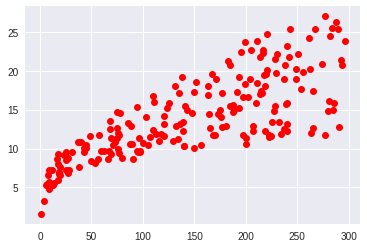

In [3]:
# Load data. Advertising dataset from "An Introduction to Statistical Learning",
# textbook by Gareth James, Robert Tibshirani, and Trevor Hastie 
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/DataScienceUB/DeepLearningfromScratch2017/master/dataset/Advertising.csv',index_col=0, delimiter=',')
train_X = data[['TV']].values 

train_Y = data.Sales.values 
train_Y = train_Y[:,np.newaxis]

n_samples = train_X.shape[0]
print n_samples
print train_X.shape, train_Y.shape
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.show()

In [4]:
import tensorflow as tf
# Define tf Graph Inputs
X = tf.placeholder("float",[None,1])
y = tf.placeholder("float",[None,1])

# Create Model variables 
# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.add(tf.multiply(X, W), b)

# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(y_pred-y,2))/(n_samples) #L2 loss

# Define the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) #Gradient descent

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0001 cost= 22815.419921875 W= -0.8040098 b= 0.008721881
Epoch: 0201 cost= 17.526868820 W= 0.07429329 b= 1.7702215
Epoch: 0401 cost= 14.376111984 W= 0.067403324 b= 3.1270704
Epoch: 0601 cost= 12.220223427 W= 0.060744297 b= 4.4361405
Epoch: 0801 cost= 11.125161171 W= 0.055446915 b= 5.4775357
Epoch: 1001 cost= 10.690587044 W= 0.051800113 b= 6.1944485
Epoch: 1201 cost= 10.554136276 W= 0.04959525 b= 6.6278973
Epoch: 1401 cost= 10.520307541 W= 0.048420917 b= 6.8587565
Epoch: 1601 cost= 10.513750076 W= 0.04787148 b= 6.966768
Epoch: 1801 cost= 10.512773514 W= 0.047647186 b= 7.0108624
Optimization Finished!
cost= 10.512662 W= 0.047568247 b= 7.0263805


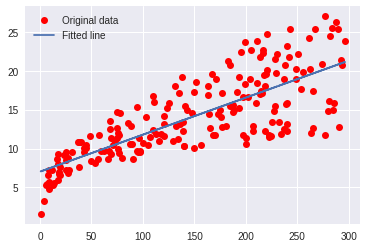

In [5]:
# Initializing the variables
init = tf.initialize_all_variables()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, y: train_Y})       

        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

### Multiple Linear Regression
Let's use three features as input vector : TV,Radio,Newspaper

In [6]:
# Parameters
learning_rate = 1e-2
training_epochs = 2000
display_step = 200

In [7]:
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/DataScienceUB/DeepLearningfromScratch2017/master/dataset/Advertising.csv',index_col=0, delimiter=',')
train_X = data[['TV','Radio','Newspaper']].values
train_Y = data.Sales.values 
train_Y = train_Y[:,np.newaxis]
n_samples = train_X.shape[0]
print n_samples
print train_X.shape, train_Y.shape


200
(200, 3) (200, 1)


In [8]:
# Define tf Graph Inputs
X = tf.placeholder("float",[None,3])
y = tf.placeholder("float",[None,1])

# Create Model variables 
# Set model weights
W = tf.Variable(tf.zeros([3, 1]),name="bias")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.matmul(X, W) + b

In [9]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(y_pred-y,2))/(2*n_samples) #L2 loss

# Define the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) #Gradient descent

In [10]:
# Initializing the variables
init = tf.initialize_all_variables()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, y: train_Y})
        
        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)
    

Epoch: 0001 cost= 88.463981628 W= [[0.01]
 [0.01]
 [0.01]] b= -0.5303935
Epoch: 0201 cost= 2.077085495 W= [[0.05410653]
 [0.22400723]
 [0.01751035]] b= -0.124288246
Epoch: 0401 cost= 1.866683960 W= [[0.05270749]
 [0.21806543]
 [0.01439589]] b= 0.3891652
Epoch: 0601 cost= 1.682526827 W= [[0.05119635]
 [0.21163084]
 [0.01103698]] b= 0.94424367
Epoch: 0801 cost= 1.550532222 W= [[0.04977683]
 [0.20559067]
 [0.00788153]] b= 1.4655855
Epoch: 1001 cost= 1.469081402 W= [[0.04856179]
 [0.20042284]
 [0.00518058]] b= 1.911779
Epoch: 1201 cost= 1.425222278 W= [[0.04760002]
 [0.19633317]
 [0.00304258]] b= 2.264948
Epoch: 1401 cost= 1.404602766 W= [[0.04689331]
 [0.19332844]
 [0.00147155]] b= 2.5244513
Epoch: 1601 cost= 1.396184683 W= [[0.04641171]
 [0.19128092]
 [0.00040095]] b= 2.701293
Epoch: 1801 cost= 1.393226147 W= [[ 0.04610837]
 [ 0.18999128]
 [-0.0002734 ]] b= 2.812679
Optimization Finished!
cost= 1.3923432 W= [[ 0.04593327]
 [ 0.1892469 ]
 [-0.00066264]] b= 2.8769717
